In [1]:
import os
import fnmatch
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import math
import gmaps
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
#nltk.download()
from datetime import datetime, timedelta

from IPython.display import display, Markdown as md

import config # Comment this line if needed
gmaps.configure(api_key=config.GOOGLE_MAPS_API_KEY) # Replace this with your Google Maps API key

dataset_location = "dataset" # change this if needed, it is assumed that all the csv files are inside that folder.

**Some helper functions**

In [2]:
def autolabel(rects, ax, vertical=True, add_value = 250):
    """
    Attach a text label above each bar displaying its height
    """
    if vertical:
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')
    else:
        for rect in rects:
            width = rect.get_width()
            #val = max(rect.get_width() + 250, rect.get_width() *  1.05)
            ax.text(rect.get_width() + add_value, rect.get_y()+0.5*rect.get_height(), '%d' % int(width), ha='center', va='center')

# Table of Contents
1. [yelp_business.csv](#yelp_business.csv)
    2. [Where most businesses are located?](#Where-most-businesses-are-located?)
    3. [Which businesses have the most reviews?](#Which-businesses-have-the-most-reviews?)
    4. [How ratings are distributed ?](#How-ratings-are-distributed-?)
    5. [Most popular categories](#Most-popular-categories)
    6. [Heatmap of Businesses](#Heatmap-of-Businesses)
    7. [Heatmap of top 3 cities where businesses are located](#Heatmap-of-top-3-cities-where-businesses-are-located)
        8. [Las Vegas](#Las-Vegas)
        9. [Phoenix](#Phoenix)
        10. [Toronto](#Toronto)
11. [yelp_review.csv](#yelp_review.csv)
    12. [How many comments does a user has?](#How-many-comments-does-a-user-has?)
    13. [How users rate businesses](#How-users-rate-businesses)
    14. [How reviews are distributed?](#How-reviews-are-distributed?)
    15. [Review count per year](#Review-count-per-year)
    16. [How given stars for ratings changed over years?](#How-given-stars-for-ratings-changed-over-years?)
    17. [Word cloud for most reviewed businesses](#Word-cloud-for-most-reviewed-businesses)
18. [yelp_business_attributes.csv](#yelp_business_attributes.csv)
    19. [Removing empty rows](#Removing-empty-rows)
    20. [Pie chart of some of the business attributes](#Pie-chart-of-some-of-the-business-attributes)
21. [yelp_checkin.csv](#yelp_checkin.csv)
    22. [Businesses with most checkins](#Businesses-with-most-checkins)
    23. [Check in counts per day](#Check-in-counts-per-day)
    24. [Check in counts per hour](#Check-in-counts-per-hour)
    25. [Check in counts per hour combined](#Check-in-counts-per-hour-combined)
26. [yelp_tip.csv](#yelp_tip.csv)
    27. [Tip/like count distribution](#Tip/like-count-distribution)
    28. [Tip count per year](#Tip-count-per-year)
29. [yelp_user.csv](#yelp_user.csv)
    30. [Yelp user registration counts per year](#Yelp-user-registration-counts-per-year)
    31. [Review count / user count](#Review-count-/-user-count)
    32. [Friend count of yelp users](#Friend-count-of-yelp-users)
33. [yelp_business_hours.csv](#yelp_business_hours.csv)
    34. [Removing rows without useful information](#Removing-rows-without-useful-information)
    35. [Average work hours per day](#Average-work-hours-per-day)
    36. [Count of open/closed businesses per day](#Count-of-open/closed-businesses-per-day)

### yelp_business.csv

In [3]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_business.csv"))

Wall time: 999 ms


In [4]:
df

business_id  \
0       FYWN1wneV18bWNgQjJ2GNg   
1       He-G7vWjzVUysIKrfNbPUQ   
2       KQPW8lFf1y5BT2MxiSZ3QA   
3       8DShNS-LuFqpEWIp0HxijA   
4       PfOCPjBrlQAnz__NXj9h_w   
5       o9eMRCWt5PkpLDE0gOPtcQ   
6       kCoE3jvEtg6UVz5SOD3GVw   
7       OD2hnuuTJI9uotcKycxg1A   
8       EsMcGiZaQuG1OOvL9iUFug   
9       TGWhGNusxyMaA4kQVBNeew   
10      XOSRcvtaKc_Q5H1SAzN20A   
11      Y0eMNa5C-YU1RQOZf9XvVA   
12      xcgFnd-MwkZeO5G2HQ0gAQ   
13      NmZtoE3v8RdSJEczYbMT9g   
14      fNMVV_ZX7CJSDWQGdOM8Nw   
15      l09JfMeQ6ynYs5MCJtrcmQ   
16      IQSlT5jGE6CCDhSG0zG3xg   
17      b2I2DXtZVnpUMCXp1JON7A   
18      0FMKDOU8TJT1x87OKYGDTg   
19      Gu-xs3NIQTj3Mj2xYoN2aw   
20      lHYiCS-y8AFjUitv6MGpxg   
21      94KziT6DQ9XlBET3WzIv_w   
22      7YIy1tXOor9VCwvaSjuBHg   
23      PMH4oUa-bWELKogdtkWewg   
24      VSGcuYDV3q-AAZ9ZPq4fBQ   
25      1K4qrnfyzKzGgJPBEcJaNQ   
26      VBHEsoXQb2AQ76J9l8h1uQ   
27      AtdXq_gu9NTE5rx4ct_dGg   
28      Dj0S-Oe4ytRJzMGUPgYUkw   
29      gAy4LYpsScrj8POnCW6btQ   
...                        ...   
174537  z9BQubTnhhZd0iTJ-THbxg   
174538  axvE68Q_osdFijj1a21Omw   
174539  swjz4q8gI79Ndg4APuHEUA   
174540  g0uFTFdKGarWEPb9gHlmag   
174541  PfSNuUa53A-N5rY1kRshmA   
174542  BhcpdT3W7YeyFeVAWPolkQ   
174543  SvW3WsatQWvR8c1iwAD_QA   
174544  nGjEV4bn0DPk8bcb0C6Aig   
174545  pUhU5ohYv65g8B47dTXAKA   
174546  sH9WsMj8sNTTSAUWv4UEEg   
174547  OMXqIZdvhDlrXlkpR34diQ   
174548  FxtrmM1a_0jcNnxiEF_Emg   
174549  iR1CIWFZOlfndjXn9fHflQ   
174550  R2oTFgwyurdx8fmZh7uAGg   
174551  6jzWUo0HAT3hNgBH-zHtYg   
174552  9ouC6BpmjFpLfHeQnLQqng   
174553  JnhuORtEQOW8XkVXB3l2tQ   
174554  vewqpBniDWKH4R05hxQwUQ   
174555  yJH_gq99aEj8xtyBaAQH8Q   
174556  n9a-3YhibkMDUEgncIivHg   
174557  fp97iuseEoP7SGv74lSnhQ   
174558  UdEmYOnk2iJDY9lpEPAlJQ   
174559  N-ujj4Xsq7Qg9A1fDGkUmA   
174560  fBUoQ3WCyQX9sMWteZfI3w   
174561  kLFm_kehXNZkUc1oa2-Eaw   
174562  ALV5R8NkZ1KGOZeuZl3u0A   
174563  gRGalHVu6BcaUDIAGVW_xQ   
174564  XXvZBIHoJBU5d6-a-oyMWQ   
174565  lNpPGgM96nPIYM1shxciHg   
174566  viKaP26BcHU6cLx8sf4gKg   

                                                     name  \
0                                      "Dental by Design"   
1                                   "Stephen Szabo Salon"   
2                                 "Western Motor Vehicle"   
3                                      "Sports Authority"   
4                              "Brick House Tavern + Tap"   
5                                               "Messina"   
6                                            "BDJ Realty"   
7                                           "Soccer Zone"   
8                                      "Any Given Sundae"   
9                                 "Detailing Gone Mobile"   
10                                    "East Coast Coffee"   
11                               "CubeSmart Self Storage"   
12                                "T & T Bakery and Cafe"   
13                                 "Complete Dental Care"   
14                           "Showmars Government Center"   
15                                       "Alize Catering"   
16                                       "T & Y Nail Spa"   
17                              "Meineke Car Care Center"   
18                                 "Senior's Barber Shop"   
19                            "Maxim Bakery & Restaurant"   
20                                            "Starbucks"   
21                                                  "Fye"   
22      "TSA Checkpoint T-4 A - Phoenix Sky Harbor Int...   
23                                     "GoodLife Fitness"   
24                                          "Sportster's"   
25                               "Chula Taberna Mexicana"   
26                                    "Alfredo's Jewelry"   
27                                            "DAVIDsTEA"   
28                                         "Panera Bread"   
29                                           "Toast Cafe"   
...                

#### Where most businesses are located?

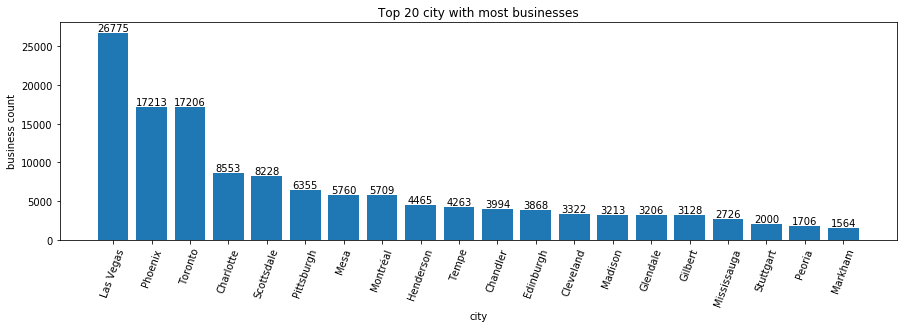

In [5]:
def plt_business_city_count(df=df):
    top_cities = Counter(list(df["city"])).most_common(20)
    fig, axes = plt.subplots(figsize=(15, 4))
    ax1 = plt.bar(range(len(top_cities)), [val[1] for val in top_cities], align='center')
    plt.xticks(range(len(top_cities)), [val[0] for val in top_cities])
    plt.xticks(rotation=70)
    plt.xlabel('city')
    plt.ylabel('business count')
    plt.title("Top %d city with most businesses" % len(top_cities))
    autolabel(ax1, axes)
    plt.show()
plt_business_city_count()

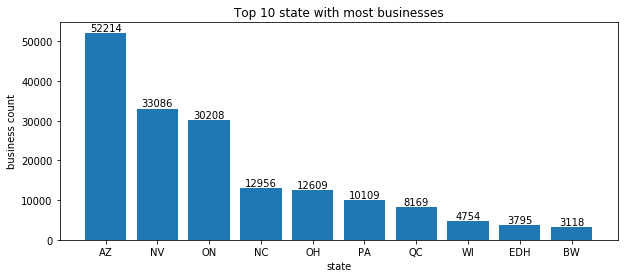

In [6]:
def plt_business_state_count(df=df):
    top_states = Counter(list(df["state"])).most_common(10)
    fig, axes = plt.subplots(figsize=(10, 4))
    ax1 = plt.bar(range(len(top_states)), [val[1] for val in top_states], align='center')
    plt.xticks(range(len(top_states)), [val[0] for val in top_states])
    plt.xlabel('state')
    plt.ylabel('business count')
    plt.title("Top %d state with most businesses" % len(top_states))
    autolabel(ax1, axes)
    plt.show()
plt_business_state_count()

#### Which businesses have the most reviews?

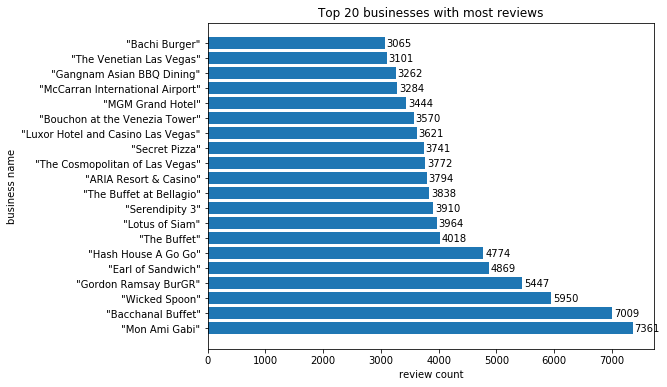

In [7]:
def plt_business_review_count(df=df):
    top_reviewed_businesses = df.nlargest(20, "review_count")#.iloc[::-1]
    names = list(top_reviewed_businesses["name"])
    reviews = list(top_reviewed_businesses["review_count"])
    l = len(names)
    fig, axes = plt.subplots(figsize=(8, 6))
    ax1 = plt.barh(range(len(reviews)), [reviews[i] for i in range(l)], align='center')
    plt.yticks(range(len(names)), [names[i] for i in range(l)])
    plt.xlabel('review count')
    plt.ylabel('business name')
    plt.title("Top %d businesses with most reviews" % l)
    autolabel(ax1, axes, False)
    plt.show()
plt_business_review_count()

Interesting fact, all of the 20 business which have the most reviews are all located in Las Vegas.

#### How ratings are distributed ?

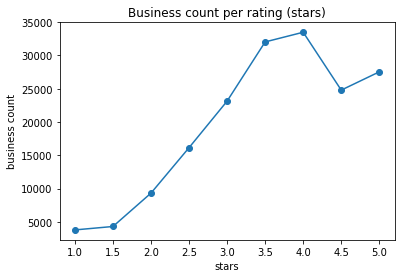

In [8]:
def plt_business_rating_distribution(df=df):
    c = Counter(list(df["stars"])).most_common()
    c.sort(key=lambda x:x[0], reverse=True)
    x,y = zip(*c)
    plt.title('Business count per rating (stars)')
    plt.xlabel('stars')
    plt.ylabel('business count')
    plt.plot(x,y, '-o')
plt_business_rating_distribution()

#### Most popular categories

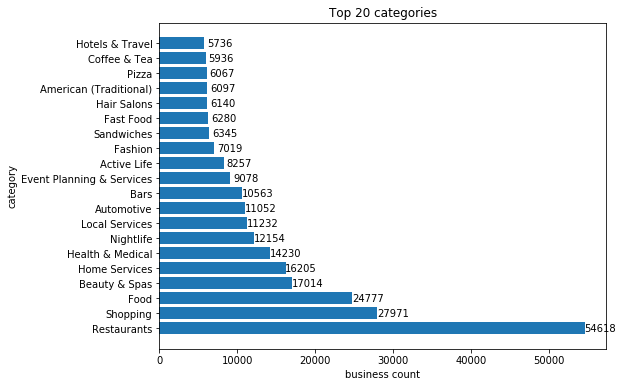

In [9]:
def plt_business_category_count(df=df):
    cat = list(df['categories'])
    categories = []
    for index in cat:
        items = index.split(';')
        for item in items:
            categories.append(item)
    counts = Counter(categories).most_common(20)
    fig, axes = plt.subplots(figsize=(8, 6))
    ax1 = plt.barh(range(len(counts)), [val[1] for val in counts], align='center')
    plt.yticks(range(len(counts)), [val[0] for val in counts])
    plt.xlabel('business count')
    plt.ylabel('category')
    plt.title("Top %d categories" % len(counts))
    autolabel(ax1, axes, False, 2000)
    plt.show()
plt_business_category_count()

#### Heatmap of Businesses

In [10]:
def plt_business_location_heatmap(df=df):
    # take rows where lat/long is not NaN
    temp = df[df['latitude'].notnull() & df['longitude'].notnull()]
    lat = list(temp['latitude'])
    long = list(temp['longitude'])
    fig = gmaps.figure(center=(41.0,-39.0), zoom_level=3)
    fig.add_layer(gmaps.heatmap_layer(zip(lat,long)))
    # can't use symbols or markers, google maps becomes unresponsive, you can comment first layer and uncomment
    # second layer to get an idea about how symbol layer works
    #fig.add_layer(gmaps.symbol_layer(temp[['latitude','longitude']][:200], fill_color="rgba(0, 150, 0, 0.4)", 
    #stroke_color="rgba(0, 150, 0, 0.4)", scale=2))
    return fig
plt_business_location_heatmap()

Figure()

As we can see from the heatmap businesses are located in US, Canada(Toronto, Montreal), Germany(Stuttgart) and United Kingdom(Edinburgh).

#### Heatmap of top 3 cities where businesses are located

##### Las Vegas

In [11]:
def plt_business_location_heatmap_lv(df=df):
    # take rows where lat/long is not NaN
    temp = df[(df['city'] =='Las Vegas') & (df['latitude'].notnull()) & (df['longitude'].notnull())]
    lat = list(temp['latitude'])
    long = list(temp['longitude'])
    data = list(zip(lat, long))
    m = folium.Map([36.1, -115.1], zoom_start=10)
    HeatMap(data, radius=8, overlay=False).add_to(m)
    #m.save(os.path.join('results', 'Heatmap.html'))
    return m
plt_business_location_heatmap_lv()

##### Phoenix

In [12]:
def plt_business_location_heatmap_ph(df=df):
    # take rows where lat/long is not NaN
    temp = df[(df['city'] =='Phoenix') & (df['latitude'].notnull()) & (df['longitude'].notnull())]
    lat = list(temp['latitude'])
    long = list(temp['longitude'])
    data = list(zip(lat, long))
    m = folium.Map([33.57, -112.07], zoom_start=10)
    HeatMap(data, radius=8, overlay=False).add_to(m)
    #m.save(os.path.join('results', 'Heatmap.html'))
    return m
plt_business_location_heatmap_ph()

##### Toronto

In [13]:
def plt_business_location_heatmap_tor(df=df):
    # take rows where lat/long is not NaN
    temp = df[(df['city'] =='Toronto') & (df['latitude'].notnull()) & (df['longitude'].notnull())]
    lat = list(temp['latitude'])
    long = list(temp['longitude'])
    data = list(zip(lat, long))
    m = folium.Map([43.70, -79.40], zoom_start=11)
    HeatMap(data, radius=8, overlay=False).add_to(m)
    #m.save(os.path.join('results', 'Heatmap.html'))
    return m
plt_business_location_heatmap_tor()

### yelp_review.csv

In [14]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_review.csv"))

Wall time: 2min 27s


In [15]:
df

review_id                 user_id  \
0        vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw   
1        n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw   
2        MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw   
3        IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw   
4        L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw   
5        HRPm3vEZ_F-33TYVT7Pebw  _4iMDXbXZ1p1ONG297YEAQ   
6        ymAUG8DZfQcFTBSOiaNN4w  u0LXt3Uea_GidxRW1xcsfg   
7        8UIishPUD92hXtScSga_gw  u0LXt3Uea_GidxRW1xcsfg   
8        w41ZS9shepfO3uEyhXEWuQ  u0LXt3Uea_GidxRW1xcsfg   
9        WF_QTN3p-thD74hqpp2j-Q  u0LXt3Uea_GidxRW1xcsfg   
10       PIsUSmvaUWB00qv5KTF1xA  u0LXt3Uea_GidxRW1xcsfg   
11       PdZ_uFjbbkjtm3SCY_KrZw  u0LXt3Uea_GidxRW1xcsfg   
12       x5oV6wm9_Pb1QQ6jkjDjwQ  u0LXt3Uea_GidxRW1xcsfg   
13       lsoSqIrrDbQvWpMvsSj2xw  u0LXt3Uea_GidxRW1xcsfg   
14       23eqwlZzCWZkADWfd9atZw  u0LXt3Uea_GidxRW1xcsfg   
15       FunI9om-aK5oMIIJmhMlZA  u0LXt3Uea_GidxRW1xcsfg   
16       FKu4iU62EmWT6GZXPJ2sgA  u0LXt3Uea_GidxRW1xcsfg   
17       xdu8nXrbNKeaywCX79KZSw  u0LXt3Uea_GidxRW1xcsfg   
18       K7o5jDInfmX3cY5oH6ATNw  u0LXt3Uea_GidxRW1xcsfg   
19       WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg   
20       HSR2RLOifd0cvSNVqGXkMQ  u0LXt3Uea_GidxRW1xcsfg   
21       Kki2nwtP8U2qmWwRvPwLRA  u0LXt3Uea_GidxRW1xcsfg   
22       Q-mhDIKa3wJuWEx9uuciIA  u0LXt3Uea_GidxRW1xcsfg   
23       ypjtMQLKdAwKGRS-KU7oxA  u0LXt3Uea_GidxRW1xcsfg   
24       vr9YpzkaVdDIauxiZYZhqA  u0LXt3Uea_GidxRW1xcsfg   
25       Ia-w-nR1FrlzsiuEiqqlbg  u0LXt3Uea_GidxRW1xcsfg   
26       y21Fom8a_SdAyC6I0v554w  u0LXt3Uea_GidxRW1xcsfg   
27       _ku1sDwkmQo2wIgWAaluZw  u0LXt3Uea_GidxRW1xcsfg   
28       Enuk_DJbK0JPmgbFU8ePKw  u0LXt3Uea_GidxRW1xcsfg   
29       iYlepMJ6j4whB8gxiZm6mw  u0LXt3Uea_GidxRW1xcsfg   
...                         ...                     ...   
5261638  ed9wg3AzsLietweZjl3CwQ  vPCYOCTMTixFXn1_60UjJQ   
5261639  K1fnP4pi9qXl2pw6G4gITQ  CPIGdVV2ByLA_nqP1F4S-Q   
5261640  koQDtQMDv-r_D9xqFqoSxw  CPIGdVV2ByLA_nqP1F4S-Q   
5261641  RYeR5-BCV7lDNXCTklDgxw  yFDFtjcsaekCW15XKk8d3A   
5261642  Va8hQZYCDh3SCAROgfEZyA  mPjPyipaD0C_myqWqDipZg   
5261643  3LeAcgfaEYtGL16j3hGgig  mPjPyipaD0C_myqWqDipZg   
5261644  M4Y_Fwfs2Mglb08z4BGzFg  mPjPyipaD0C_myqWqDipZg   
5261645  CIMhrYaTrldYxWqYlYPN-A  mPjPyipaD0C_myqWqDipZg   
5261646  3SLi--RX6MZSsk4GrgqnPA  mPjPyipaD0C_myqWqDipZg   
5261647  y-6IJvH2M1H3Xmz5u9g5hg  mPjPyipaD0C_myqWqDipZg   
5261648  Bafy91RpLI10hJmeKOQOuw  mPjPyipaD0C_myqWqDipZg   
5261649  z9wJdAjysjEOGSKBaIvMGg  mPjPyipaD0C_myqWqDipZg   
5261650  JldIaWJdtnTJVQxmh-3SAA  mPjPyipaD0C_myqWqDipZg   
5261651  aC7nxWLyM283uM78xry9mw  mPjPyipaD0C_myqWqDipZg   
5261652  pX2pe-fnU1i2xzs1ght1mA  mPjPyipaD0C_myqWqDipZg   
5261653  FJ0y1AnFAJ8MzNRZRdTJnw  mPjPyipaD0C_myqWqDipZg   
5261654  W63llfTEM02-WpKBA2P9pQ  mPjPyipaD0C_myqWqDipZg   
5261655  C0uT2UJQ3yz9hqE4h3sy2A  mPjPyipaD0C_myqWqDipZg   
5261656  xq3eoPr_fJFNl_NVIxccvw  mPjPyipaD0C_myqWqDipZg   
5261657  Q76zOoiQklh62ZTmA4gJZQ  mPjPyipaD0C_myqWqDipZg   
5261658  gls24x_dYK8mYbxlVTHycw  mPjPyipaD0C_myqWqDipZg   
5261659  MV8UTz9z_-4FG-nI8TOjPQ  mPjPyipaD0C_myqWqDipZg   
5261660  dyW1tIaWbm_RfCFCffY9yg  mPjPyipaD0C_myqWqDipZg   
5261661  ZU2UF0YBkhQFctXH5Mry3A  mPjPyipaD0C_myqWqDipZg   
5261662  evfB2Xzw4u7aYftWClQfeg  mPjPyipaD0C_myqWqDipZg   
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   
5261664  -CJNPrDWgIkorx4iEZJXIg  mPjPyipaD0C_myqWqDipZg   
5261665  W9eVvOcpBvG6lpJPoJOxuA  mPjPyipaD0C_myqWqDipZg   
5261666  hqQ1UTFKMN2P1ezUow48OQ  mPjPyipaD0C_myqWqDipZg   
5261667  ldsIs3sGXPJ7WM7VyAm4lQ  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
0        AEx2SYEUJmTxVVB18LlCwA      5  2016-05-28   
1        VR6GpWIda3SfvPC-lg9H3w      5  2016-05-28   
2        CKC0-MOWMqoeWf6s-szl8g      5  2016-05-28   
3        ACFtxLv8pGrrxMm6EgjreA      4  2016-05-28   
4        s2I_Ni76bjJNK9yG60iD-Q      4  2016-05-28   
5        8QWPlVQ6D-OExqXoaD2Z1g      5 

#### How many comments does a user has?

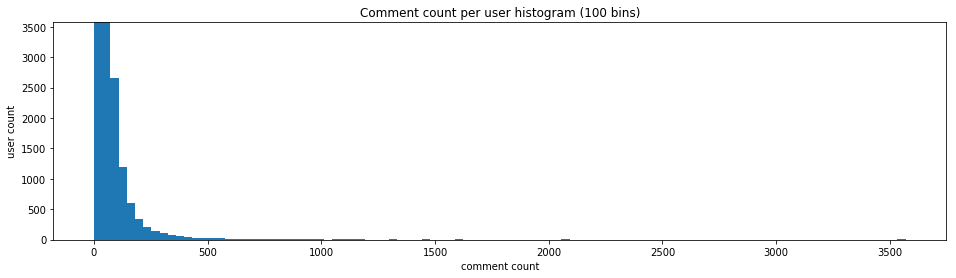

In [16]:
def plt_review_user_review_count_histogram(df=df):
    c = Counter(list(df["user_id"])).most_common()
    _, data = zip(*c)
    bins = np.linspace(math.ceil(min(data)), math.floor(max(data)), 100)
    fig, axes = plt.subplots(figsize=(16, 4))
    plt.ylim([min(data)-5, max(data)+5])
    plt.hist(data, bins=bins)
    plt.xlabel('comment count')
    plt.ylabel('user count')
    plt.title('Comment count per user histogram (%d bins)' % len(bins))
    plt.show()
plt_review_user_review_count_histogram(df)

#### How users rate businesses

[(1, 731363), (2, 438161), (3, 615481), (4, 1223316), (5, 2253347)]


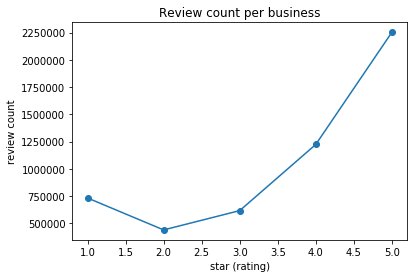

In [17]:
def plt_review_star_distribution(df=df):
    c = Counter(list(df["stars"])).most_common()
    c.sort(key=lambda x:x[0], reverse=True)
    x,y = zip(*c)
    print(c[::-1])
    plt.title('Review count per business')
    plt.xlabel('star (rating)')
    plt.ylabel('review count')
    plt.plot(x,y, '-o')
    plt.show()
plt_review_star_distribution()

#### How reviews are distributed?

A review can be marked as useful-funny-cool by another users. A review can be marked more than once.

useful review count:	7287858
funny review count:	2679221
cool review count:	3083820


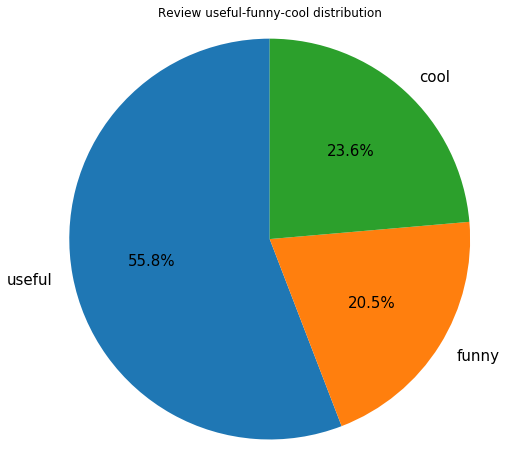

In [18]:
def plt_review_state_distribution(df=df):
    c_useful = sum(list(df["useful"]))
    c_funny = sum(list(df["funny"]))
    c_cool = sum(list(df["cool"]))
    counts = [c_useful, c_funny, c_cool]
    labels = 'useful', 'funny', 'cool'
    for i in range(len(counts)):
        print('%s review count:\t%d' % (labels[i], counts[i]))
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    patches, texts, autotexts = ax1.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
    for text in texts:
        text.set_fontsize(15)
    for text in autotexts:
        text.set_fontsize(15)
    ax1.axis('equal')
    plt.title('Review useful-funny-cool distribution')
    plt.show()
plt_review_state_distribution()

#### Review count per year

First we check date range for comments

In [19]:
md("Latest date: %s<br>First date: %s"% (max(df['date']), min(df['date'])))

Latest date: 2017-12-11<br>First date: 2004-07-22

{2004: 14, 2005: 870, 2006: 5669, 2007: 23020, 2008: 61553, 2009: 98288, 2010: 187073, 2011: 290933, 2012: 350381, 2013: 472595, 2014: 678351, 2015: 911487, 2016: 1052916, 2017: 1128518}


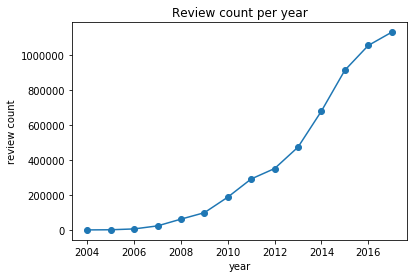

In [20]:
def plt_review_count_per_year(df=df):
    counts = dict()
    for year in range(2004, 2018):
        count = len(df[((df['date'] >= '%s-01-01' % str(year)) & (df['date'] < '%s-01-01' % str(year + 1)))])
        counts[year] = count
    print (counts)
    plt.title('Review count per year')
    plt.xlabel('year')
    plt.ylabel('review count')
    plt.plot(counts.keys(),counts.values(), '-o')
    plt.show()
plt_review_count_per_year()

#### How given stars for ratings changed over years?

{2004: 4.29, 2005: 4.02, 2006: 3.83, 2007: 3.82, 2008: 3.74, 2009: 3.68, 2010: 3.69, 2011: 3.67, 2012: 3.66, 2013: 3.67, 2014: 3.7, 2015: 3.72, 2016: 3.76, 2017: 3.79}


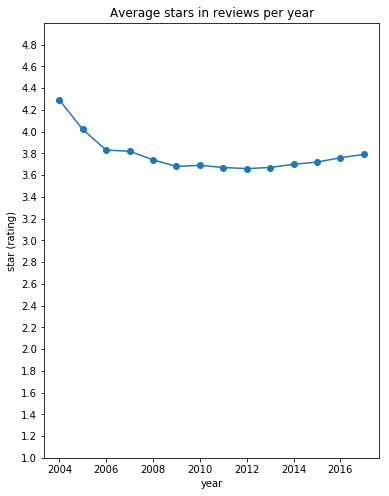

In [21]:
def plt_review_avg_stars_per_year(df=df):
    counts = dict()
    for year in range(2004, 2018):
        temp = df[((df['date'] >= '%s-01-01' % str(year)) & (df['date'] < '%s-01-01' % str(year + 1)))]
        rating_avg = sum(temp['stars']) / len(temp)
        counts[year] = round(rating_avg, 2)
    print (counts)
    plt.subplots(figsize=(6,8))
    plt.ylim(1, 5)
    plt.yticks(np.arange(1, 5, 0.2))
    plt.title('Average stars in reviews per year')
    plt.xlabel('year')
    plt.ylabel('star (rating)')
    plt.plot(counts.keys(),counts.values(), '-o')
    plt.show()
plt_review_avg_stars_per_year()

#### Word cloud for most reviewed businesses

In [22]:
temp_df = pd.read_csv(os.path.join(dataset_location, "yelp_business.csv"))
display(md("""**Note:** Since it wasn't feasible to create a word cloud for all reviews(%d reviews) we decided to do word cloud for 
high/low ratings. <br>But also rating amounts were too high. (%d / %d)<br>
Next approach was checking high/low ratings per business. (%d / %d)<br>
Assuming every business has 10 reviews this also won't be feasible.
So we did word cloud for top businesses.""" % 
   (len(df),len(df[df['stars'] == 5]),len(df[df['stars'] == 4]), len(temp_df[temp_df['stars'] == 5]), len(temp_df[temp_df['stars'] == 4]))))
del temp_df

**Note:** Since it wasn't feasible to create a word cloud for all reviews(5261668 reviews) we decided to do word cloud for 
high/low ratings. <br>But also rating amounts were too high. (2253347 / 1223316)<br>
Next approach was checking high/low ratings per business. (27540 / 33492)<br>
Assuming every business has 10 reviews this also won't be feasible.
So we did word cloud for top businesses.

Review count:	7362
Word count:	430106


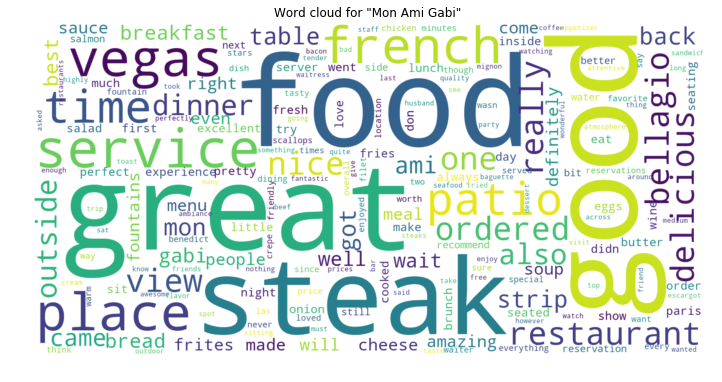

Review count:	7006
Word count:	527242


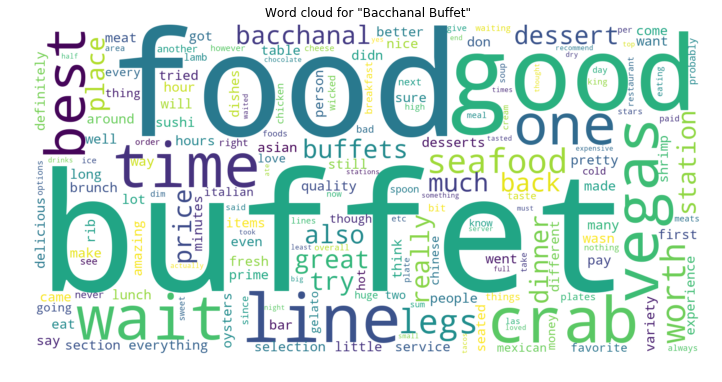

Review count:	5951
Word count:	415389


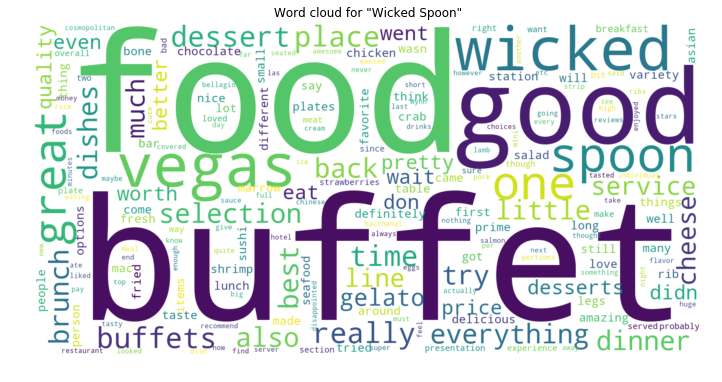

In [23]:
def plt_review_word_cloud_from_business(business_name, df=df):
    temp_df = pd.read_csv(os.path.join(dataset_location, "yelp_business.csv"))
    restaurant_id = temp_df.loc[temp_df['name'] == business_name, 'business_id'].values[0] #find id of restaurant
    sentences = list(df[df['business_id'] == restaurant_id]['text']) # find review text for the restaurant
    stopwords=set(STOPWORDS)
    #s=set(stopwords.words('english'))
    ctr = Counter()
    wordList = []
    for sentence in list(sentences):
        #words = re.sub("[^\w]", " ",  sentence).split()
        words = filter(lambda w: not w in stopwords and len(w) > 2, re.sub("[^\w]", " ",  sentence.lower()).split())
        wordList.extend(words)
    print ('Review count:\t%d\nWord count:\t%d' % (len(sentences), len(wordList)))
    common= Counter(wordList)
    wordcloud = WordCloud(background_color='white', scale=4, stopwords=stopwords).generate_from_frequencies(common)
    plt.subplots(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word cloud for %s' % business_name)
    plt.show()
plt_review_word_cloud_from_business('"Mon Ami Gabi"')
plt_review_word_cloud_from_business('"Bacchanal Buffet"')
plt_review_word_cloud_from_business('"Wicked Spoon"')

### yelp_business_attributes.csv

In [24]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_business_attributes.csv"))

Wall time: 2.21 s


In [25]:
df

business_id AcceptsInsurance ByAppointmentOnly  \
0       FYWN1wneV18bWNgQjJ2GNg               Na                Na   
1       He-G7vWjzVUysIKrfNbPUQ               Na                Na   
2       8DShNS-LuFqpEWIp0HxijA               Na                Na   
3       PfOCPjBrlQAnz__NXj9h_w               Na                Na   
4       o9eMRCWt5PkpLDE0gOPtcQ               Na                Na   
5       kCoE3jvEtg6UVz5SOD3GVw               Na                Na   
6       OD2hnuuTJI9uotcKycxg1A               Na                Na   
7       EsMcGiZaQuG1OOvL9iUFug               Na                Na   
8       TGWhGNusxyMaA4kQVBNeew               Na                Na   
9       XOSRcvtaKc_Q5H1SAzN20A               Na                Na   
10      Y0eMNa5C-YU1RQOZf9XvVA               Na                Na   
11      xcgFnd-MwkZeO5G2HQ0gAQ               Na                Na   
12      NmZtoE3v8RdSJEczYbMT9g               Na                Na   
13      fNMVV_ZX7CJSDWQGdOM8Nw               Na                Na   
14      l09JfMeQ6ynYs5MCJtrcmQ               Na                Na   
15      IQSlT5jGE6CCDhSG0zG3xg               Na                Na   
16      b2I2DXtZVnpUMCXp1JON7A               Na                Na   
17      0FMKDOU8TJT1x87OKYGDTg               Na                Na   
18      Gu-xs3NIQTj3Mj2xYoN2aw               Na                Na   
19      lHYiCS-y8AFjUitv6MGpxg               Na                Na   
20      94KziT6DQ9XlBET3WzIv_w               Na                Na   
21      PMH4oUa-bWELKogdtkWewg               Na                Na   
22      VSGcuYDV3q-AAZ9ZPq4fBQ               Na                Na   
23      1K4qrnfyzKzGgJPBEcJaNQ               Na                Na   
24      VBHEsoXQb2AQ76J9l8h1uQ               Na                Na   
25      AtdXq_gu9NTE5rx4ct_dGg               Na                Na   
26      Dj0S-Oe4ytRJzMGUPgYUkw               Na                Na   
27      gAy4LYpsScrj8POnCW6btQ               Na                Na   
28      nbhBRhZtdaZmMMeb2i02pg               Na                Na   
29      zzMu-6SmqhpvHxVRM6tx9g               Na                Na   
...                        ...              ...               ...   
152011  dWoAayHRyIrkk1dcvBxv3Q               Na                Na   
152012  Ls_nR1MEcsOw5KuTlh0dfQ               Na                Na   
152013  6AGvafGH6q6x5yQnHIQwHQ               Na                Na   
152014  qbMN30jySx1-qShrymti8w               Na                Na   
152015  fukaxeFh8W9ijOp8sCrDyA               Na                Na   
152016  xqNpOnxY0XzdnUE4sjmg0w               Na                Na   
152017  axvE68Q_osdFijj1a21Omw               Na                Na   
152018  swjz4q8gI79Ndg4APuHEUA               Na                Na   
152019  g0uFTFdKGarWEPb9gHlmag               Na                Na   
152020  BhcpdT3W7YeyFeVAWPolkQ               Na                Na   
152021  SvW3WsatQWvR8c1iwAD_QA               Na                Na   
152022  nGjEV4bn0DPk8bcb0C6Aig               Na                Na   
152023  pUhU5ohYv65g8B47dTXAKA               Na                Na   
152024  sH9WsMj8sNTTSAUWv4UEEg               Na                Na   
152025  FxtrmM1a_0jcNnxiEF_Emg               Na                Na   
152026  iR1CIWFZOlfndjXn9fHflQ               Na                Na   
152027  R2oTFgwyurdx8fmZh7uAGg               Na                Na   
152028  6jzWUo0HAT3hNgBH-zHtYg               Na                Na   
152029  9ouC6BpmjFpLfHeQnLQqng               Na                Na   
152030  JnhuORtEQOW8XkVXB3l2tQ               Na                Na   
152031  vewqpBniDWKH4R05hxQwUQ               Na                Na   
152032  yJH_gq99aEj8xtyBaAQH8Q               Na                Na   
152033  n9a-3YhibkMDUEgncIivHg               Na                Na   
152034  UdEmYOnk2iJDY9lpEPAlJQ               Na                Na   
152035  N-ujj4Xsq7Qg9A1fDGkUmA               Na                Na   
152036  kLFm_kehXNZkUc1oa2-Eaw               Na                Na   
152037  gRGalHVu6

In [26]:
list(df.columns.values)

['business_id',
 'AcceptsInsurance',
 'ByAppointmentOnly',
 'BusinessAcceptsCreditCards',
 'BusinessParking_garage',
 'BusinessParking_street',
 'BusinessParking_validated',
 'BusinessParking_lot',
 'BusinessParking_valet',
 'HairSpecializesIn_coloring',
 'HairSpecializesIn_africanamerican',
 'HairSpecializesIn_curly',
 'HairSpecializesIn_perms',
 'HairSpecializesIn_kids',
 'HairSpecializesIn_extensions',
 'HairSpecializesIn_asian',
 'HairSpecializesIn_straightperms',
 'RestaurantsPriceRange2',
 'GoodForKids',
 'WheelchairAccessible',
 'BikeParking',
 'Alcohol',
 'HasTV',
 'NoiseLevel',
 'RestaurantsAttire',
 'Music_dj',
 'Music_background_music',
 'Music_no_music',
 'Music_karaoke',
 'Music_live',
 'Music_video',
 'Music_jukebox',
 'Ambience_romantic',
 'Ambience_intimate',
 'Ambience_classy',
 'Ambience_hipster',
 'Ambience_divey',
 'Ambience_touristy',
 'Ambience_trendy',
 'Ambience_upscale',
 'Ambience_casual',
 'RestaurantsGoodForGroups',
 'Caters',
 'WiFi',
 'RestaurantsReservati

In [27]:
base_len = len(df)

#### Removing empty rows

**Note:** This is not the most efficient method to remove useless rows, we could have tried to read csv with column types predefined to use `df.dropna(thresh=2)` but this method works so for now we go with this method.

In [28]:
%%time
def remove_empty_rows(df=df):
    cols = list(df.columns.values)
    for index, row in df.iterrows():
        emptyCol = True
        for col in cols[1:]:
            if row[col] != 'Na':
                emptyCol = False
            if not emptyCol:
                break
        if emptyCol:
            df = df.drop(index)
    return df
df = remove_empty_rows()

Wall time: 1min 22s


In [29]:
md("Original dataframe length:%d<br>New dataframe length: %d<br>Deleted row count: %d"%(base_len, len(df), base_len-len(df)))

Original dataframe length:152041<br>New dataframe length: 151825<br>Deleted row count: 216

#### Pie chart of some of the business attributes

In [30]:
def get_attr_results(df, attr):
    results = dict()
    options = [ x for x in list(df[attr].unique()) if x != 'Na' ]
    for val in options:
        results[val] = len(df[df[attr] == val])
    return results

Some of the business attributes plotted in a pie chart. 'Na' values are removed before.

Business accepts credit cards: {'False': 12450, 'True': 11131}
Business serves alcohol: {'True': 7632, 'False': 2780}
Business has WiFi: {'True': 60, 'False': 37}
Business accepts Bitcoin: {'True': 218, 'False': 186}


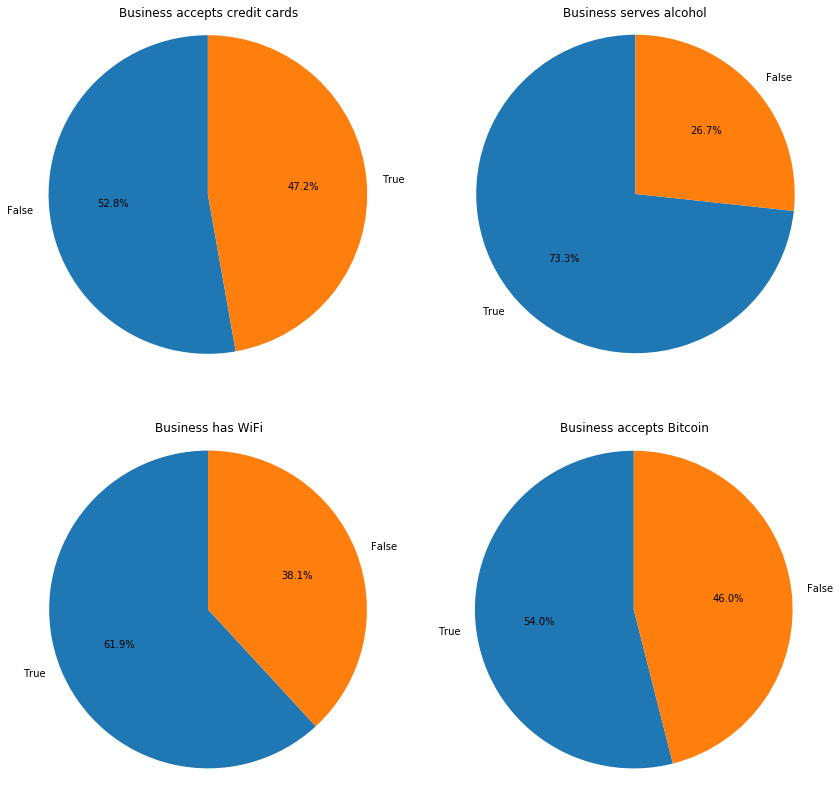

In [31]:
def plt_business_attributes_pie(df=df):
    cc = get_attr_results(df, 'BusinessAcceptsCreditCards')
    alcohol = get_attr_results(df, 'Alcohol')
    wifi = get_attr_results(df, 'WiFi')
    bitcoin = get_attr_results(df, 'BusinessAcceptsBitcoin')
    plt.subplots(figsize=(14,14))
    plt.subplot(2, 2, 1)
    plt.title('Business accepts credit cards')
    plt.pie(cc.values(), labels=cc.keys(), autopct='%1.1f%%', shadow=False, startangle=90)
    plt.axis('equal')
    
    plt.subplot(2, 2, 2)
    plt.title('Business serves alcohol')
    plt.pie(alcohol.values(), labels=alcohol.keys(), autopct='%1.1f%%', shadow=False, startangle=90)
    plt.axis('equal')
    
    plt.subplot(2, 2, 3)
    plt.title('Business has WiFi')
    plt.pie(wifi.values(), labels=wifi.keys(), autopct='%1.1f%%', shadow=False, startangle=90)
    plt.axis('equal')

    plt.subplot(2, 2, 4)
    plt.title('Business accepts Bitcoin')
    plt.pie(bitcoin.values(), labels=bitcoin.keys(), autopct='%1.1f%%', shadow=False, startangle=90)
    plt.axis('equal')
        
    print('Business accepts credit cards:', cc)
    print('Business serves alcohol:', alcohol)
    print('Business has WiFi:', wifi)
    print('Business accepts Bitcoin:', bitcoin)
    
    plt.show()
plt_business_attributes_pie()

### yelp_checkin.csv

In [32]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_checkin.csv"))

Wall time: 3.83 s


In [33]:
df

business_id weekday   hour  checkins
0        3Mc-LxcqeguOXOVT_2ZtCg     Tue   0:00        12
1        SVFx6_epO22bZTZnKwlX7g     Wed   0:00         4
2        vW9aLivd4-IorAfStzsHww     Tue  14:00         1
3        tEzxhauTQddACyqdJ0OPEQ     Fri  19:00         1
4        CEyZU32P-vtMhgqRCaXzMA     Tue  17:00         1
5        9dn5pee_n2dWQfN57xoJpg     Sun   3:00         5
6        6Zk5F7fsTr8n2CJTlaxHlw     Wed   1:00         4
7        OE_IDW5w_W97sBcZvq2Img     Sat   1:00         1
8        gy5pr5bFAjOL5rERSdMCLg     Sat  15:00         1
9        r2-eAhGANXlcgQy898tTaw     Mon  19:00         1
10       wiBxwslJAGDdZ2nmLOWDjg     Mon  16:00         1
11       08jURVR_eDvXq9scdIgcmg     Sat  23:00         1
12       BlWPjh2WuvQSlmYmgFsylg     Sun   0:00         1
13       6DO_2jivyxcL6SXGPXUJLQ     Wed  23:00         1
14       wrJROwvVKHvdMVIZO7HUrw     Thu  21:00         3
15       uU8up3hGwW9qnzQD1HZsMQ     Fri   0:00         1
16       JHPq9KvMuJaC7CPATSYeew     Sun  16:00         1
17       vyzfT3_KzLi8WmInwIVPeg     Thu   9:00         1
18       E4T0rQBJa0e4HIliBrI4lA     Thu  23:00         2
19       vuvnexwJzb1ydKLacBP8xg     Mon  18:00         1
20       BCORM4dEleJXnyPXoaH3HQ     Sun  22:00         2
21       CppOcUSapx5kU2lQNt2w5w     Tue  15:00         1
22       dEPGOBuRjV3p4mQ7fgPxxw     Thu  23:00         1
23       jCzrbfboRc3D-9_Gr0Wm9w     Tue  19:00         3
24       jkhEPQovg6JKPzUr43MC_g     Sun  19:00         2
25       5renm7L6gBnRkDHoPQVW3w     Mon  13:00         2
26       tku3pYiZrQLCT12MXr-OHA     Mon  18:00         2
27       uo-40ZDaRJBoh-PY4dbCgQ     Thu  18:00         1
28       LtbF0qDeCpQ95sMW_IEn0g     Fri  22:00         1
29       Gyrez6K8f1AyR7dzW9fvAw     Sun  19:00         8
...                         ...     ...    ...       ...
3911188  9LZnA-r7GmdGmh-UPi8o5w     Fri  22:00         1
3911189  HkY2wwA_cvTyxSllbsZDBA     Fri  18:00         1
3911190  7IEQBmoEe7ne20rp5Aup-w     Wed   5:00         2
3911191  ULorIRUT_iUhfhgosY4ubw     Sat  21:00         3
3911192  qeJ8OUASkd0KQ1oEN3P--w     Wed  17:00         1
3911193  Z9FR2A7RzBf1nxwRdlccJQ     Sun  14:00         3
3911194  0DQ31asd4IeOTI7dkZ3OXQ     Fri   3:00         1
3911195  JQmL65YrNVUmptU44SKLLA     Mon   2:00         1
3911196  wLV7MpP_uDc2OuzFcU0ZZA     Tue  18:00         2
3911197  wixpe7dtg1m-F3haekYkwQ     Sat  22:00        23
3911198  ydcNlRMKs93AQpOhVkSrGQ     Tue  18:00         2
3911199  39sCYNzSYk_z8v_KoLH0KA     Thu   3:00         1
3911200  iVEk9a746zY2DR5JrpzgPg     Mon   2:00         2
3911201  xlNOEaT6XQvKN7tIZvOqqA     Wed  18:00         8
3911202  fKZJdcRb6MpyfZSiRis5Ww     Sat  14:00         4
3911203  YFsb1ydMxFLrxtJ3CffVhw     Wed   4:00        21
3911204  zB_qKuXiztrTsmLdag3AUQ     Tue  18:00         1
3911205  RUe0HUHbihn2aZrJ7BDRzw     Tue  23:00         1
3911206  XUcJiJx4x1RBtE31XrNexw     Fri  21:00         6
3911207  nDPJbFX-M3mbm9DAjYYS6w     Sun  16:00         1
3911208  wLXkfS8wx6VZ9f4Qji759w     Fri   1:00         2
3911209  Hffn4NndeV5IRPP5jJurvg     Wed   1:00         1
3911210  g0vpjTVdbzyQGc7TpdyeZg     Wed  16:00         2
3911211  OE_IDW5w_W97sBcZvq2Img     Tue   1:00         6
3911212  a7loRpI_pv3ZaWvW0Y46XQ     Wed  15:00         8
3911213  CZKHXlDuy3IagC2W881fyA     Fri   5:00         7
3911214  mUWE-uNGyCiifmboWbyMqQ     Mon  17:00         1
3911215  nFR7dDedxRuBeZz_6Cdalg     Mon  23:00         1
3911216  y3YRUsh8FVih0AhYLx-DWA     Thu  21:00         1
3911217  MfWBM8gcsUn7RC_PmhsHhw     Tue   3:00         1

[3911218 rows x 4 columns]

In [34]:
md("Unique business count: %d" % len(df['business_id'].unique()))

Unique business count: 146350

#### Businesses with most checkins

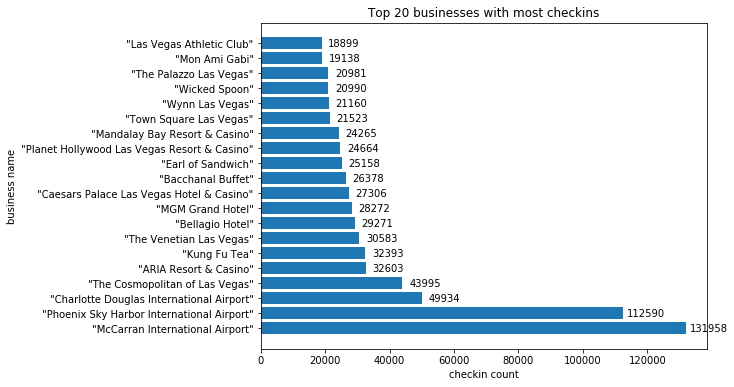

In [35]:
def plt_checkin_counts_business(df=df):
    k = df.groupby(['business_id',])['checkins'].sum().sort_values(ascending=False).to_frame().reset_index()
    temp = pd.read_csv(os.path.join(dataset_location, "yelp_business.csv"))
    ids = list(k['business_id'])
    checkins = list(k['checkins'])
    fig, axes = plt.subplots(figsize=(8, 6))
    l = 20
    names = []
    for i in range(l):
        names.append(temp.loc[temp['business_id'] == ids[i], 'name'].values[0])
    ax1 = plt.barh(range(l), [checkins[i] for i in range(l)], align='center')
    plt.yticks(range(l), [names[i] for i in range(l)])
    plt.xlabel('checkin count')
    plt.ylabel('business name')
    plt.title("Top %d businesses with most checkins" % l)
    autolabel(ax1, axes, False, 7000)
    plt.show()
plt_checkin_counts_business()

#### Check in counts per day

{'Mon': 1986033, 'Tue': 1925357, 'Wed': 1996661, 'Thu': 2055125, 'Fri': 2387436, 'Sat': 3291582, 'Sun': 3006164}


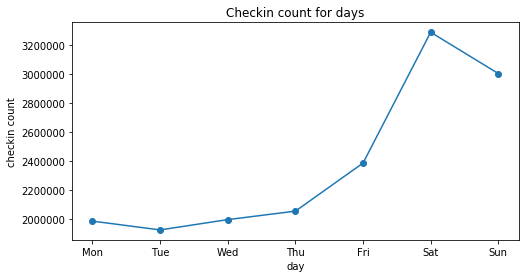

In [36]:
def plt_checkin_counts_per_day(df=df):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    counts = dict()
    for day in days:
        counts[day] = sum(df[df['weekday'] == day]['checkins'])
    print (counts)
    fig, axes = plt.subplots(figsize=(8, 4))
    plt.title('Checkin count for days')
    plt.xlabel('day')
    plt.ylabel('checkin count')
    plt.xticks(np.arange(7), days) 
    plt.plot(counts.values(), '-o')
    plt.show()
plt_checkin_counts_per_day()

#### Check in counts per hour

In [37]:
def plt_checkin_counts_per_hour(df=df):
    k = df.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()
    hours = [str(i) +':00' for i in range(0,24)]
    plt.figure(figsize=(14,6))
    #plt.xticks(np.arange(24), k['hour'])
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for day in days:
        plt.xticks(np.arange(24), hours)
        checkins = []
        for hour in hours:
            checkins.append(list(k[(k['weekday'] == day) & (k['hour'] == hour)]['checkins'])[0])
        plt.plot( checkins, '-o', label=day)
    plt.title('Checkin counts per hour')
    plt.xlabel('hours')
    plt.ylabel('checkin counts')
    plt.legend()
    plt.show()
plt_checkin_counts_per_hour()

#### Check in counts per hour combined

In [38]:
def plt_checkin_counts_per_hour_combined(df=df):
    k = df.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()
    hours = [str(i) +':00' for i in range(0,24)]
    checkins = []
    for hour in hours:
        checkins.append(sum(list(k[k['hour'] == hour]['checkins'])))
    plt.figure(figsize=(14,6))
    plt.xticks(np.arange(24), hours)
    plt.plot(checkins, '-o')
    plt.title('Checkin counts per hour (combined)')
    plt.xlabel('hours')
    plt.ylabel('checkin counts')
    plt.show()
plt_checkin_counts_per_hour_combined()

### yelp_tip.csv

In [39]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_tip.csv"))

Wall time: 2.98 s


In [40]:
df

text        date  likes  \
0        Great breakfast large portions and friendly wa...  2015-08-12      0   
1        Nice place. Great staff.  A fixture in the tow...  2014-06-20      0   
2                           Happy hour 5-7 Monday - Friday  2016-10-12      0   
3        Parking is a premium, keep circling, you will ...  2017-01-28      0   
4                   Homemade pasta is the best in the area  2017-02-25      0   
5        Excellent service, staff is dressed profession...  2017-04-08      0   
6                 Come early on Sunday's to avoid the rush  2016-07-03      0   
7                                         Love their soup!  2016-01-07      0   
8                                     Soups are fantastic!  2016-05-22      0   
9                        Thursday night is $5 burger night  2016-06-09      0   
10       Very good for lunch, bread and soup are excellent  2016-06-01      0   
11       Tuesday spaghetti special  all day $5.59 inclu...  2016-06-14      0   
12       Sunday $.55 bone-in wings\nMonday $.55 boneles...  2016-08-22      0   
13                    There isn't a bad seat in the house!  2017-01-21      0   
14           Nice happy hour m-f 5-7pm and th-fr 10pm-12am  2016-06-13      0   
15       Always have something new on the inter menu, l...  2016-06-30      0   
16       Brisket sandwich not bad but ask for extra nap...  2015-10-28      0   
17       Double wide does offer free charging stations ...  2016-02-11      0   
18                       Black Angus and the Roast beef :)  2012-12-03      0   
19               Expensive, but convenient for hotel stays  2012-12-02      0   
20       It's a beautiful day to fly in North Carolina....  2012-01-18      0   
21       Cloudy, a bit rainy, but it should be a great ...  2012-01-20      0   
22       Connecting here on way to Philadelphia...finally.  2012-03-31      0   
23                                     Hot here too. Dang!  2012-06-20      0   
24       My gold service rate was going to be $100. My ...  2012-11-12      0   
25       For Gold members Hertz has a new "concierge" s...  2012-01-18      0   
26       Negotiated the upgrades. You just might get a ...  2012-10-09      0   
27                          Carfirmations is where it's at  2012-11-14      0   
28       Finally, found some churros. Four types here. ...  2012-03-28      0   
29       Smooth on time arrival at noonish. Reported Te...  2012-03-27      0   
...                                                    ...         ...    ...   
1098294                     Always excellent quick service  2016-07-30      0   
1098295                 Highly recommend the Hash Benedict  2017-12-03      0   
1098296  detailed my motor looked brand new  great job ...  2017-12-10      0   
1098297  These guys were great, simple process, results...  2017-11-22      0   
1098298  good services and quick response even for the ...  2017-12-07      0   
1098299  Awesome all you can eat Korean BBQ. friendly s...  2017-11-30      0   
1098300                     They close at 9ish on Sundays.  2017-12-10      0   
1098301  Oh, and 2 persons minimum, if not you'll have ...  2017-12-10      0   
1098302                    doesnt offer 67 cent hamburgers  2017-08-16      0   
1098303                                      Lmfao he gone  2017-10-16      0   
1098304  Look for the room in the back with the pool ta...  2017-12-05      0   
1098305         Beautiful place and the staff was great!!!  2017-11-24      0   
1098306               Yummy! So good! Worth every calorie!  2017-12-03      0   
1098307                                          Uuyrjthhg  2017-12-04      0   
1098308  Bring earplugs and be prepared to wait a longt...  2017-12-06      0   
1098309  Bad service. Went there yesterday and the wait...  2013-06-20      0   
1098310  They have very good General Tao's chicken,\nI ...  2016-02-24      0   
1098311  Consistently great Thai food. Traditional Pad ...  2016-03-13      0   
1098

#### Tip/like count distribution

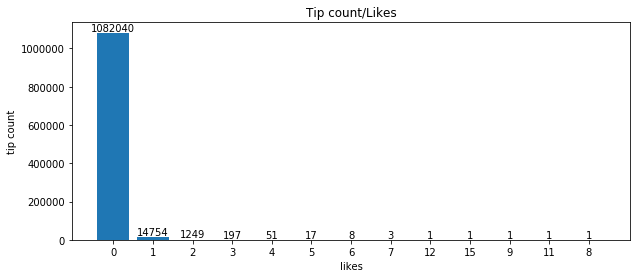

In [41]:
top_states = Counter(list(df['likes'])).most_common()
fig, axes = plt.subplots(figsize=(10, 4))
ax1 = plt.bar(range(len(top_states)), [val[1] for val in top_states], align='center')
plt.xticks(range(len(top_states)), [val[0] for val in top_states])
plt.xlabel('likes')
plt.ylabel('tip count')
plt.title("Tip count/Likes")
autolabel(ax1, axes)
plt.show()

#### Tip count per year

First we check date range for tips

In [42]:
print("Latest date:\t%s\nFirst date:\t%s"% (max(df['date']), min(df['date'])))

Latest date:	2017-12-11
First date:	2009-04-15


{2009: 934, 2010: 41010, 2011: 143683, 2012: 182254, 2013: 164808, 2014: 161403, 2015: 129514, 2016: 140256, 2017: 134462}


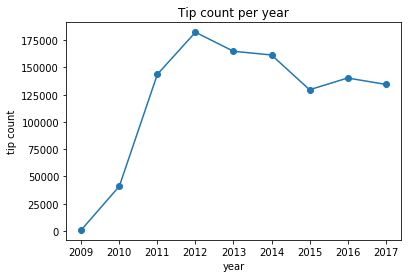

In [43]:
def plt_tip_count_per_year(df=df):
    counts = dict()
    for year in range(2009, 2018):
        count = len(df[((df['date'] >= '%s-01-01' % str(year)) & (df['date'] < '%s-01-01' % str(year + 1)))])
        counts[year] = count
    print (counts)
    plt.title('Tip count per year')
    plt.xlabel('year')
    plt.ylabel('tip count')
    plt.plot(counts.keys(),counts.values(), '-o')
    plt.show()
plt_tip_count_per_year()

### yelp_user.csv

In [44]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_user.csv"))

Wall time: 22 s


In [45]:
df

user_id       name  review_count yelping_since  \
0        JJ-aSuM4pCFPdkfoZ34q0Q      Chris            10    2013-09-24   
1        uUzsFQn_6cXDh6rPNGbIFA      Tiffy             1    2017-03-02   
2        mBneaEEH5EMyxaVyqS-72A       Mark             6    2015-03-13   
3        W5mJGs-dcDWRGEhAzUYtoA     Evelyn             3    2016-09-08   
4        4E8--zUZO1Rr1IBK4_83fg       Lisa            11    2012-07-16   
5        Ob-2oGBQ7rwwYwUvhmnf7g          B             9    2012-05-01   
6        JaTVvKsBl0bHHJEpESn4pQ      Peter             2    2013-03-23   
7        Ykj0DVsz0c6rX9ghjd0hDg    Colleen             1    2010-10-10   
8        kmyEPfKnHQJdTceCdoyMQg          A             7    2012-10-16   
9        H54pA7YHfjl8IjhHAfdXJA       Chad             3    2010-06-25   
10       WRae-wZkpRoxMrgJdqwyxg       Mike             1    2017-11-29   
11       Mmv5fPxbF8XEMN4EPT_Khg      Chris             2    2016-06-24   
12       LdqGHXsNQowMrvgTNburJA      Susan             1    2013-09-29   
13       TsgBsn19Wjwpyo81gF9_8Q      Cathy             4    2010-11-28   
14       V--GjQPlTpeWbcB2cS06Gw       Cody             2    2017-10-24   
15       a_gKYQ5YMg39FHNYJLWRHg    Joselyn             1    2017-11-07   
16       sz8Heh56kO_6_LBkoIhNfA    Rosalie             4    2015-06-25   
17       h5ERTYn2vQ1QbjTZvfWPaA      Bobby             3    2017-01-07   
18       jYnkJR3T8yCERXywoVhWYA       Hugo            48    2010-07-06   
19       GMGZsk1dj043UI3zWgo3cw       volk             0    2011-08-05   
20       eMBV7FugCJq7FIvGhARo2Q       Jack             1    2012-09-22   
21       h5_D5TlEN4bREoy3vR-Vxw       John             1    2017-10-25   
22       bsRNTZ1osSKjuGpHBwX2Pw   Jennifer             1    2017-12-10   
23       8wxTBgvIkCgEZrNfTc1eWQ       mike             4    2011-03-11   
24       moJE85Sfg7Itd3-iIvduQQ       Alan             1    2013-07-10   
25       tkqAUCre66jVB9BbTsZPDA   Hers And             4    2016-03-20   
26       y3ONpOBwpnXb57QNlWUhWQ    Cynthia             1    2016-12-06   
27       PASVfluTGQC5vpjdl-jinw      Brian             1    2014-11-14   
28       bOJZW_hvGkVEIQVwhyqSuw     Justin             2    2013-12-07   
29       LLb4Y_gVVtE38ymLy9gC7g      Lesya             2    2013-08-02   
...                         ...        ...           ...           ...   
1326070  g0jcKgrMopI5Z0aIe_Q3AQ  Katharine            14    2009-12-10   
1326071  zdjX4sKCfWVv92iZ0vEdAg        Jay            16    2012-08-01   
1326072  PUb05eA5xWYxR1wFCY7W6A       Jack             2    2015-03-08   
1326073  ZQ0S-0_oU1A8E6Y20OezFw      Cindy             1    2016-03-14   
1326074  5jLn0PpgysPwikxI_zOx8Q       Rita             1    2014-06-14   
1326075  2aYXOEXsjBcg3wnVaKbr9g       eric             4    2008-12-19   
1326076  6TIvrz3kxevpPfxg1Cyl2A     carmen             4    2010-01-17   
1326077  GG2PfUL6xHZOehVLIhfc1Q       Lena             2    2014-09-02   
1326078  s8pPV0MiBWf7xdxy11wo1w     Steven             1    2015-02-16   
1326079  XZX-cJiHZ_vteSsH5N6mKA  Stephanie             2    2017-05-06   
1326080  pU4oJ4UiyImvLd9x8sUCpw    Charley             6    2017-05-28   
1326081  U5BtAXbMqb9p0iTtaCXGZA      James             4    2011-11-25   
1326082  k4lT1kd4BrOacQs7whPHNA      Jesus             1    2017-12-09   
1326083  646W1zUohswEYZ3AOcDI_g      Emily             2    2016-09-28   
1326084  ZX-JDNkbGN4fwc5JHhmxLQ    Zachary             2    2015-08-30   
1326085  6-kyWwwAMBFcEBRnn9kZoQ     Rebeca             4    2012-10-03   
1326086  yTqx3WpupCyzVKmf6LVhlg      Kemal             2    2012-01-25   
1326087  jmJfUBEH7-zYj3junwJg3w  Brit-knee             3    2016-01-05   
1326088  _41RFi2K3hjCDwXmsor9mg    Colleen             1    2016-06-08   
1326089  08alpHmnSju9MiknfrycMQ      Megan             4    2015-07-09   
1326090  D5SZz60_r-MN-8fJGj3axA  Constance             6    2013-12-17   
1326091  AOZ5zYQXNQy8nTUEMdrXWw   Bikenboy             4    2010-02-19   
1326092  6acB6P0ESB_b34XdEuF

#### Yelp user registration counts per year

Date range check for registrations

In [46]:
print("Latest date:\t%s\nFirst date:\t%s"% (max(df['yelping_since']), min(df['yelping_since'])))

Latest date:	2017-12-11
First date:	2004-10-12


{2004: 75, 2005: 979, 2006: 5951, 2007: 16364, 2008: 32433, 2009: 60905, 2010: 99785, 2011: 152353, 2012: 161880, 2013: 175483, 2014: 198976, 2015: 196149, 2016: 147593, 2017: 77174}


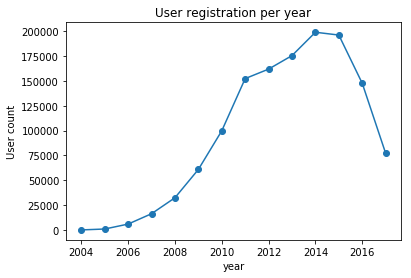

In [47]:
def plt_user_yelping_since_per_year(df=df):
    counts = dict()
    for year in range(2004, 2018):
        count = len(df[((df['yelping_since'] >= '%s-01-01' % str(year)) & (df['yelping_since'] < '%s-01-01' % str(year + 1)))])
        counts[year] = count
    print (counts)
    plt.title('User registration per year')
    plt.xlabel('year')
    plt.ylabel('User count')
    plt.plot(counts.keys(),counts.values(), '-o')
    plt.show()
plt_user_yelping_since_per_year()

#### Review count / user count

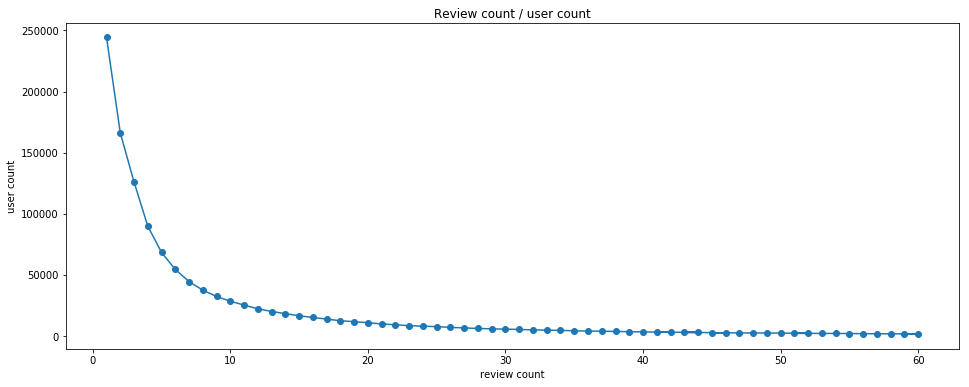

In [48]:
def plt_user_review_user_count(df=df):
    counts = Counter(list(df['review_count'])).most_common(60)
    plt.figure(figsize=(16,6))
    x,y = zip(*counts)
    plt.ylabel('user count')
    plt.xlabel('review count')
    plt.title('Review count / user count')
    plt.plot(x,y, '-o')
    plt.show()
plt_user_review_user_count()

In [49]:
print("Average star rating of yelp users(from %d users): %.2f" % (len(df), (sum(df['average_stars']) / len(df))))

Average star rating of yelp users(from 1326100 users): 3.71


#### Friend count of yelp users

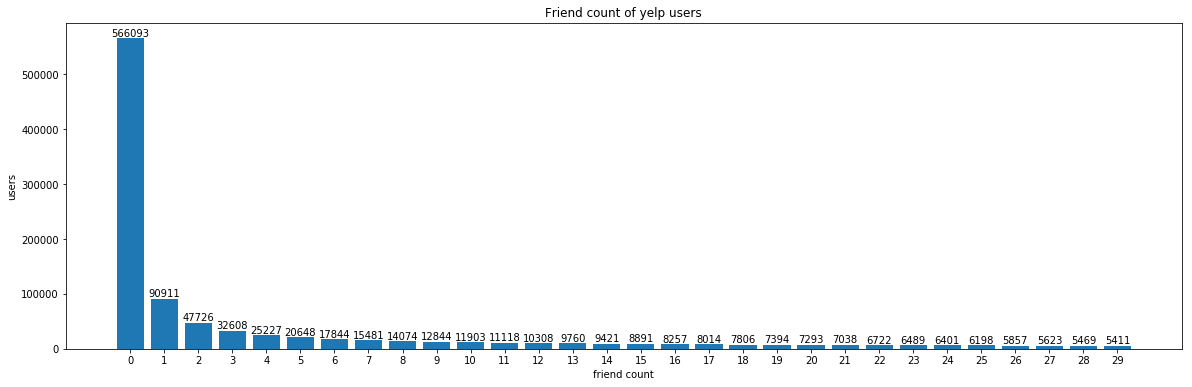

In [50]:
friend_count = []
for friends in df['friends']:
    if friends == 'None': friend_count.append(0)
    else:
        friend_count.append(len(friends.split(',')))
ctr = Counter(friend_count).most_common(30)
fig, axes = plt.subplots(figsize=(20, 6))
ax1 = plt.bar(range(len(ctr)), [val[1] for val in ctr], align='center')
plt.xticks(range(len(ctr)), [val[0] for val in ctr])
plt.xlabel('friend count')
plt.ylabel('users')
plt.title("Friend count of yelp users")
autolabel(ax1, axes)
plt.show()

In [51]:
print('Average yelp user has %.f friends.' % (sum(friend_count) / len(df)))

Average yelp user has 37 friends.


### yelp_business_hours.csv

In [52]:
%%time
df = pd.read_csv(os.path.join(dataset_location, "yelp_business_hours.csv"))

Wall time: 348 ms


In [53]:
df

business_id       monday      tuesday    wednesday  \
0       FYWN1wneV18bWNgQjJ2GNg    7:30-17:0    7:30-17:0    7:30-17:0   
1       He-G7vWjzVUysIKrfNbPUQ     9:0-20:0     9:0-20:0     9:0-20:0   
2       KQPW8lFf1y5BT2MxiSZ3QA         None         None         None   
3       8DShNS-LuFqpEWIp0HxijA    10:0-21:0    10:0-21:0    10:0-21:0   
4       PfOCPjBrlQAnz__NXj9h_w     11:0-1:0     11:0-1:0     11:0-1:0   
5       o9eMRCWt5PkpLDE0gOPtcQ     18:0-0:0     18:0-0:0     18:0-0:0   
6       kCoE3jvEtg6UVz5SOD3GVw     8:0-17:0     8:0-17:0     8:0-17:0   
7       OD2hnuuTJI9uotcKycxg1A    11:0-19:0    11:0-19:0    11:0-19:0   
8       EsMcGiZaQuG1OOvL9iUFug         None         None         None   
9       TGWhGNusxyMaA4kQVBNeew     9:0-18:0     9:0-18:0     9:0-18:0   
10      XOSRcvtaKc_Q5H1SAzN20A         None         None         None   
11      Y0eMNa5C-YU1RQOZf9XvVA    9:30-18:0    9:30-18:0    9:30-18:0   
12      xcgFnd-MwkZeO5G2HQ0gAQ         None         None         None   
13      NmZtoE3v8RdSJEczYbMT9g     8:0-17:0     8:0-17:0     8:0-14:0   
14      fNMVV_ZX7CJSDWQGdOM8Nw     7:0-15:0     7:0-15:0     7:0-15:0   
15      l09JfMeQ6ynYs5MCJtrcmQ     9:0-22:0     9:0-22:0     9:0-22:0   
16      IQSlT5jGE6CCDhSG0zG3xg     9:0-19:0     9:0-19:0     9:0-19:0   
17      b2I2DXtZVnpUMCXp1JON7A    7:30-18:0    7:30-18:0    7:30-18:0   
18      0FMKDOU8TJT1x87OKYGDTg     9:0-18:0     9:0-18:0     9:0-18:0   
19      Gu-xs3NIQTj3Mj2xYoN2aw   11:30-22:0   11:30-22:0   11:30-22:0   
20      lHYiCS-y8AFjUitv6MGpxg    5:30-22:0    5:30-22:0    5:30-22:0   
21      94KziT6DQ9XlBET3WzIv_w         None         None         None   
22      7YIy1tXOor9VCwvaSjuBHg         None         None         None   
23      PMH4oUa-bWELKogdtkWewg    0:0-23:59    0:0-23:59    0:0-23:59   
24      VSGcuYDV3q-AAZ9ZPq4fBQ     16:0-2:0     16:0-2:0     16:0-2:0   
25      1K4qrnfyzKzGgJPBEcJaNQ    11:30-2:0    11:30-2:0    11:30-2:0   
26      VBHEsoXQb2AQ76J9l8h1uQ    10:0-17:0    10:0-17:0    10:0-17:0   
27      AtdXq_gu9NTE5rx4ct_dGg    10:0-21:0    10:0-21:0    10:0-21:0   
28      Dj0S-Oe4ytRJzMGUPgYUkw    6:30-21:0    6:30-21:0    6:30-21:0   
29      gAy4LYpsScrj8POnCW6btQ     7:0-15:0     7:0-15:0     7:0-15:0   
...                        ...          ...          ...          ...   
174537  z9BQubTnhhZd0iTJ-THbxg    10:0-22:0    10:0-22:0    10:0-22:0   
174538  axvE68Q_osdFijj1a21Omw         None         None         None   
174539  swjz4q8gI79Ndg4APuHEUA     9:0-17:0     9:0-17:0     9:0-17:0   
174540  g0uFTFdKGarWEPb9gHlmag    7:0-17:30    7:0-17:30    7:0-17:30   
174541  PfSNuUa53A-N5rY1kRshmA         None         None         None   
174542  BhcpdT3W7YeyFeVAWPolkQ     8:0-17:0     8:0-17:0     8:0-17:0   
174543  SvW3WsatQWvR8c1iwAD_QA     13:0-2:0     13:0-2:0     13:0-2:0   
174544  nGjEV4bn0DPk8bcb0C6Aig         None    10:0-18:0    10:0-18:0   
174545  pUhU5ohYv65g8B47dTXAKA     5:0-21:0     5:0-21:0     5:0-21:0   
174546  sH9WsMj8sNTTSAUWv4UEEg    10:0-20:0    10:0-20:0    10:0-20:0   
174547  OMXqIZdvhDlrXlkpR34diQ    6:0-15:30    6:0-15:30    6:0-15:30   
174548  FxtrmM1a_0jcNnxiEF_Emg    11:30-0:0    11:30-0:0    11:30-0:0   
174549  iR1CIWFZOlfndjXn9fHflQ     11:0-1:0     11:0-1:0     11:0-1:0   
174550  R2oTFgwyurdx8fmZh7uAGg         None         None         None   
174551  6jzWUo0HAT3hNgBH-zHtYg     8:0-23:0     8:0-23:0     8:0-23:0   
174552  9ouC6BpmjFpLfHeQnLQqng    10:0-20:0    10:0-20:0    10:0-20:0   
174553  JnhuORtEQOW8XkVXB3l2tQ      0:0-0:0      0:0-0:0      0:0-0:0   
174554  vewqpBniDWKH4R05hxQwUQ      0:0-0:0      0:0-0:0      0:0-0:0   
174555  yJH_gq99aEj8xtyBaAQH8Q  11:30-22:30  11:30-22:30  11:30-22:30   
174556  n9a-3YhibkMDUEgncIivHg         None         None         None   
174557  fp97iuseEoP7SGv74lSnhQ         None         None         None   
174558  UdEmYOnk2iJDY9lpEPAlJQ    11:0-21:0    11:0-21:0    11:0-21:0   
174559  N-ujj4Xsq7Qg9A1fDGkUmA     9:0-21:0     9:0-21:0     9:0-21:0   
1745

In [54]:
row_count = len(df)

#### Removing rows without useful information

In [55]:
df = df.drop(df[(df['monday'] == 'None') & (df['tuesday'] == 'None') & (df['wednesday'] == 'None') & (df['thursday'] == 'None') & (df['friday'] == 'None') & (df['saturday'] == 'None') & (df['sunday'] == 'None')].index).reset_index(drop=True)

In [56]:
df

business_id       monday      tuesday    wednesday  \
0       FYWN1wneV18bWNgQjJ2GNg    7:30-17:0    7:30-17:0    7:30-17:0   
1       He-G7vWjzVUysIKrfNbPUQ     9:0-20:0     9:0-20:0     9:0-20:0   
2       8DShNS-LuFqpEWIp0HxijA    10:0-21:0    10:0-21:0    10:0-21:0   
3       PfOCPjBrlQAnz__NXj9h_w     11:0-1:0     11:0-1:0     11:0-1:0   
4       o9eMRCWt5PkpLDE0gOPtcQ     18:0-0:0     18:0-0:0     18:0-0:0   
5       kCoE3jvEtg6UVz5SOD3GVw     8:0-17:0     8:0-17:0     8:0-17:0   
6       OD2hnuuTJI9uotcKycxg1A    11:0-19:0    11:0-19:0    11:0-19:0   
7       TGWhGNusxyMaA4kQVBNeew     9:0-18:0     9:0-18:0     9:0-18:0   
8       Y0eMNa5C-YU1RQOZf9XvVA    9:30-18:0    9:30-18:0    9:30-18:0   
9       NmZtoE3v8RdSJEczYbMT9g     8:0-17:0     8:0-17:0     8:0-14:0   
10      fNMVV_ZX7CJSDWQGdOM8Nw     7:0-15:0     7:0-15:0     7:0-15:0   
11      l09JfMeQ6ynYs5MCJtrcmQ     9:0-22:0     9:0-22:0     9:0-22:0   
12      IQSlT5jGE6CCDhSG0zG3xg     9:0-19:0     9:0-19:0     9:0-19:0   
13      b2I2DXtZVnpUMCXp1JON7A    7:30-18:0    7:30-18:0    7:30-18:0   
14      0FMKDOU8TJT1x87OKYGDTg     9:0-18:0     9:0-18:0     9:0-18:0   
15      Gu-xs3NIQTj3Mj2xYoN2aw   11:30-22:0   11:30-22:0   11:30-22:0   
16      lHYiCS-y8AFjUitv6MGpxg    5:30-22:0    5:30-22:0    5:30-22:0   
17      PMH4oUa-bWELKogdtkWewg    0:0-23:59    0:0-23:59    0:0-23:59   
18      VSGcuYDV3q-AAZ9ZPq4fBQ     16:0-2:0     16:0-2:0     16:0-2:0   
19      1K4qrnfyzKzGgJPBEcJaNQ    11:30-2:0    11:30-2:0    11:30-2:0   
20      VBHEsoXQb2AQ76J9l8h1uQ    10:0-17:0    10:0-17:0    10:0-17:0   
21      AtdXq_gu9NTE5rx4ct_dGg    10:0-21:0    10:0-21:0    10:0-21:0   
22      Dj0S-Oe4ytRJzMGUPgYUkw    6:30-21:0    6:30-21:0    6:30-21:0   
23      gAy4LYpsScrj8POnCW6btQ     7:0-15:0     7:0-15:0     7:0-15:0   
24      nbhBRhZtdaZmMMeb2i02pg     7:0-15:0     7:0-15:0     7:0-15:0   
25      zzMu-6SmqhpvHxVRM6tx9g    7:0-17:30    7:0-17:30    7:0-17:30   
26      1_3nOM7s9WqnJWTNu2-i8Q   11:30-14:0   17:0-21:30   17:0-21:30   
27      FXHfcFVEfI1vVngW2gVOpw    17:0-23:0    11:0-23:0    11:0-23:0   
28      7gquCdaFoHZCcLYDttpHtw   9:30-19:30   9:30-19:30   9:30-19:30   
29      ok38fApaT1TBEU-IH85BvA     9:0-18:0     9:0-18:0     9:0-18:0   
...                        ...          ...          ...          ...   
129230  WGOBgUeuRrrnRp5R5SMKAQ    10:0-18:0    10:0-18:0    10:0-18:0   
129231  dWoAayHRyIrkk1dcvBxv3Q    13:0-20:0    13:0-20:0    13:0-20:0   
129232  Ls_nR1MEcsOw5KuTlh0dfQ   11:30-22:0   11:30-22:0   11:30-22:0   
129233  6AGvafGH6q6x5yQnHIQwHQ     8:0-17:0     8:0-17:0     8:0-17:0   
129234  qbMN30jySx1-qShrymti8w     9:0-17:0     9:0-17:0     9:0-17:0   
129235  xqNpOnxY0XzdnUE4sjmg0w    11:0-19:0    11:0-19:0    11:0-19:0   
129236  z9BQubTnhhZd0iTJ-THbxg    10:0-22:0    10:0-22:0    10:0-22:0   
129237  swjz4q8gI79Ndg4APuHEUA     9:0-17:0     9:0-17:0     9:0-17:0   
129238  g0uFTFdKGarWEPb9gHlmag    7:0-17:30    7:0-17:30    7:0-17:30   
129239  BhcpdT3W7YeyFeVAWPolkQ     8:0-17:0     8:0-17:0     8:0-17:0   
129240  SvW3WsatQWvR8c1iwAD_QA     13:0-2:0     13:0-2:0     13:0-2:0   
129241  nGjEV4bn0DPk8bcb0C6Aig         None    10:0-18:0    10:0-18:0   
129242  pUhU5ohYv65g8B47dTXAKA     5:0-21:0     5:0-21:0     5:0-21:0   
129243  sH9WsMj8sNTTSAUWv4UEEg    10:0-20:0    10:0-20:0    10:0-20:0   
129244  OMXqIZdvhDlrXlkpR34diQ    6:0-15:30    6:0-15:30    6:0-15:30   
129245  FxtrmM1a_0jcNnxiEF_Emg    11:30-0:0    11:30-0:0    11:30-0:0   
129246  iR1CIWFZOlfndjXn9fHflQ     11:0-1:0     11:0-1:0     11:0-1:0   
129247  6jzWUo0HAT3hNgBH-zHtYg     8:0-23:0     8:0-23:0     8:0-23:0   
129248  9ouC6BpmjFpLfHeQnLQqng    10:0-20:0    10:0-20:0    10:0-20:0   
129249  JnhuORtEQOW8XkVXB3l2tQ      0:0-0:0      0:0-0:0      0:0-0:0   
129250  vewqpBniDWKH4R05hxQwUQ      0:0-0:0      0:0-0:0      0:0-0:0   
129251  yJH_gq99aEj8xtyBaAQH8Q  11:30-22:30  11:30-22:30  11:30-22:30   
129252  UdEmYOnk2iJDY9lpEPAlJQ    11:0-21:0    11:0-21:0    11:0-21:0   
1292

In [57]:
print('First row count: %d\nAfter removing rows without useful information we have %d rows left.' % (row_count, len(df)))

First row count: 174567
After removing rows without useful information we have 129260 rows left.


#### Average work hours per day

Couple of formatting information:
* If a business has work hours marked as **None** for the day, than it is counted as **no hours** for that day.
* If a business has the **same start-end time** for that day (ex: 0:0-0:0), than it is counted as **24 hours** for that day.
* If end hour for the work hours is **lower than starting hour** (ex: 17:0-2:0), although technically time after midnight should be counted for next day, here it is counted for **current day**.

**Some helper functions to calculate time difference**

In [58]:
def time_difference(s1, s2):
    FMT = '%H:%M'
    tdelta = datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)
    if tdelta.days < 0:
        tdelta = timedelta(days=0, seconds=tdelta.seconds, microseconds=tdelta.microseconds)
    return tdelta.seconds

{'monday': 10.27, 'tuesday': 10.77, 'wednesday': 10.85, 'thursday': 10.95, 'friday': 10.98, 'saturday': 9.44, 'sunday': 7.03}


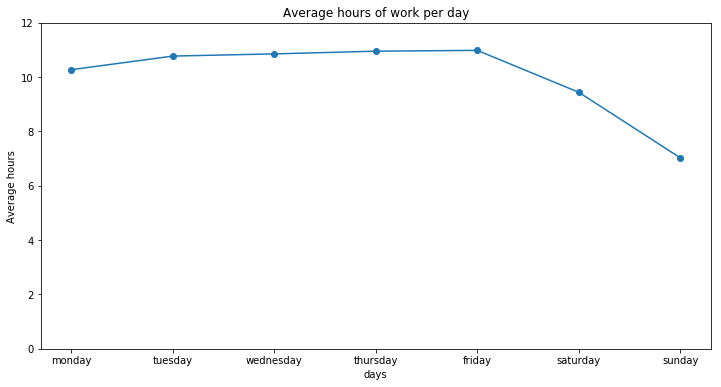

In [59]:
def plt_business_hours_avg_work_hours_day(df=df):
    avg_hours = {}
    for day in list(df.columns.values)[1:]:
        total = 0.0
        lst = list(df[day])
        for item in lst:
            if item == 'None': continue
            else:
                hours = item.split('-')
                dif = time_difference(hours[0], hours[1]) / 3600
                if dif == 0: total += 24
                else: total += dif
        avg_hours[day] = round(total / len(df), 2)
    print(avg_hours)
    plt.subplots(figsize=(12, 6))
    plt.title('Average hours of work per day')
    plt.xlabel('days')
    plt.ylabel('Average hours')
    plt.xticks(np.arange(7), avg_hours.keys())
    plt.ylim(0,12)
    plt.plot(avg_hours.values(), '-o')
    plt.show()
plt_business_hours_avg_work_hours_day()

#### Count of open/closed businesses per day

{'monday': [118874, 10386], 'tuesday': [126258, 3002], 'wednesday': [127437, 1823], 'thursday': [127936, 1324], 'friday': [127433, 1827], 'saturday': [113024, 16236], 'sunday': [83633, 45627]}


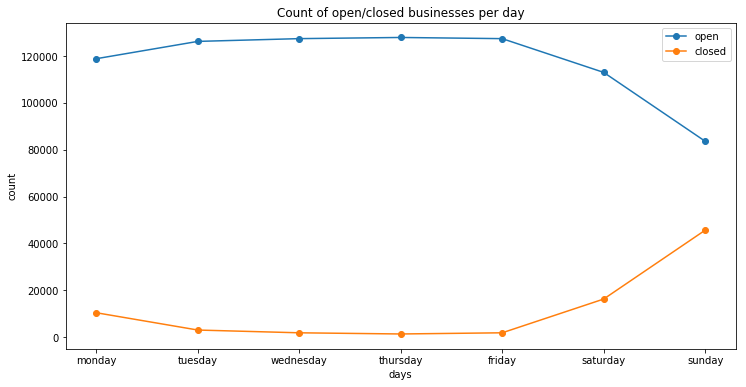

In [60]:
def plt_business_hours_open_closed_count_day(df=df):
    open_closed_count = {}
    for day in list(df.columns.values)[1:]:
        closed = len(df[df[day] =='None'])
        working = len(df) - closed
        open_closed_count[day] = [working, closed]
    print (open_closed_count)
    plt.subplots(figsize=(12, 6))
    plt.xticks(np.arange(7), open_closed_count.keys())
    #plt.ylim(0,12)
    plt.plot([v[0] for v in list(open_closed_count.values())], '-o', label='open')
    plt.plot([v[1] for v in list(open_closed_count.values())], '-o', label ='closed')
    plt.legend()
    plt.title('Count of open/closed businesses per day')
    plt.xlabel('days')
    plt.ylabel('count')
    plt.show()
plt_business_hours_open_closed_count_day()